# Clase 3

## Plotting

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
sns.set(rc={'figure.figsize': (12,8)})

In [35]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Line plot
Los gráficos que todos conocemos, muy comunes para visualizar series de tiempo

In [36]:
df = pd.read_csv('data/data_stocks.csv', parse_dates=['date'], index_col='date')

In [37]:
VOO = df.query('symbol == "VOO"')

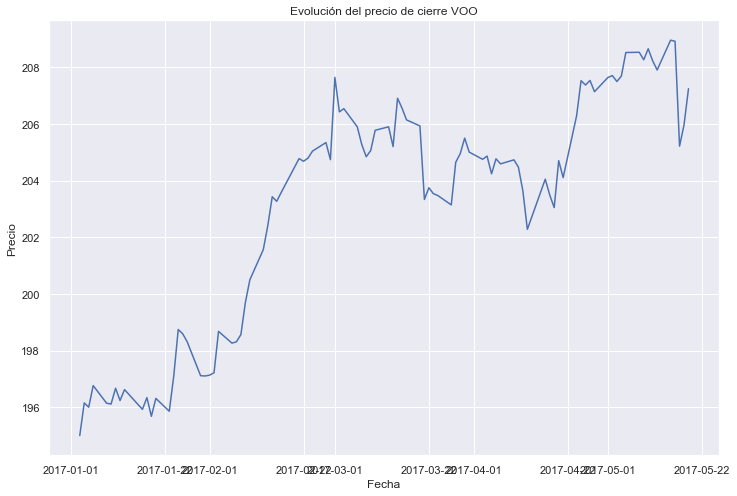

In [38]:
plt.plot(VOO.index, VOO.adjClose);
plt.title("Evolución del precio de cierre VOO")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

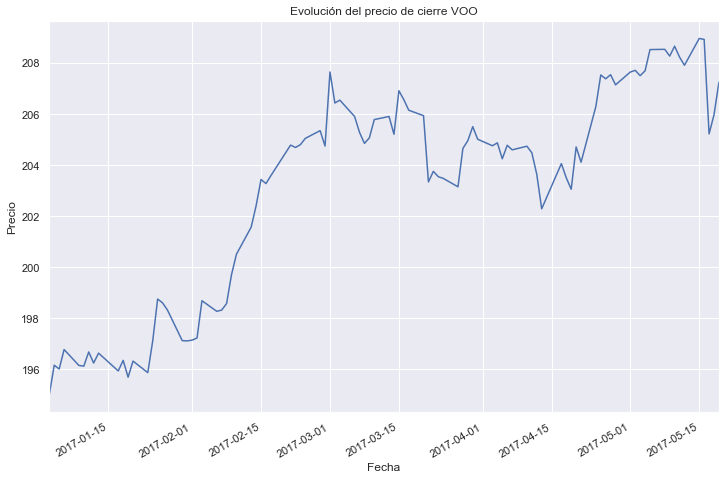

In [39]:
# También se puede usar la funcion .plot() de pandas que usa matplotlib por detrás; en este caso de hecho
# arregla mejor los labels en el eje x. La función plotea la(s) columna(s) del df contra el índice.
VOO['adjClose'].plot(title='Evolución del precio de cierre VOO');
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()

### Scatter plots
Muestra puntos individuales correspondientes a (en el caso 2D) dos variables numéricas. Muy común para visualizar relaciones entre variables o para buscar _clusters_.

In [40]:
iris = sns.load_dataset('iris')

In [41]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


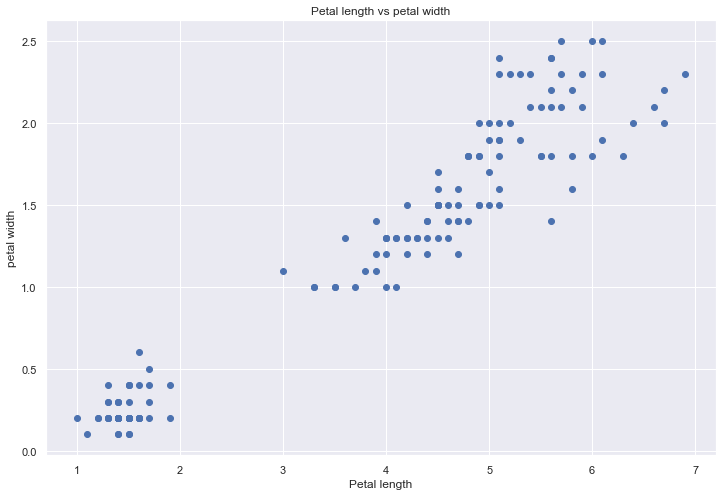

In [42]:
plt.scatter(iris['petal_length'], iris['petal_width'])
plt.title("Petal length vs petal width")
plt.xlabel("Petal length")
plt.ylabel("petal width")
plt.show()

En seaborn aplicar distintos colores por categoría (en este caso especie) se puede hacer a traves del parámetro `hue`.

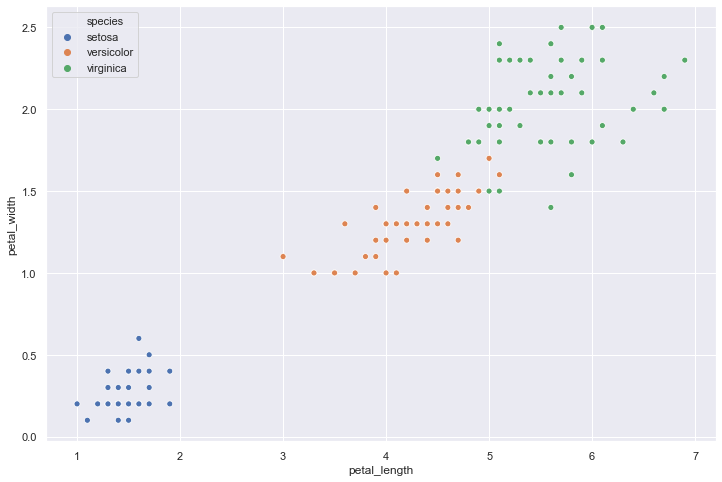

In [43]:
sns.scatterplot(x=iris['petal_length'], y=iris["petal_width"], data=iris, hue="species")

plt.legend()
plt.show()

### Histogramas
Ya los vimos, son para ver distribuciones de variables. Pueden ser engañosos porque el número de bins que uno elija cambia mucho el resultado; una elección común es tomar $\sqrt{n}$ bins, donde $n$ es la cantidad de observaciones.

In [44]:
setosa = iris.query('species == "setosa"')

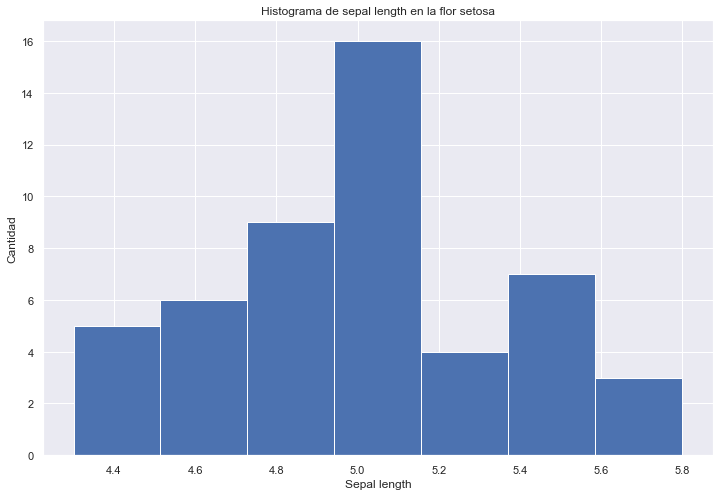

In [45]:
plt.hist(setosa['sepal_length'], bins = 7)
plt.xlabel("Sepal length")
plt.ylabel("Cantidad")
plt.title("Histograma de sepal length en la flor setosa")
plt.show()

Los histogramas en seaborn se hacen con `displot`. Por default seaborn hace una estimación de una posible densidad asociada al histograma ([KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation), por _Kernel density estimation_). Se puede pasar `kde = False` para no mostrarla. Seaborn también _normaliza_ el histograma por default, lo que quiere decir que en el eje _y_ no se muestra la cantidad total de observaciones, sino la cantidad en relación al total de observaciones y el ancho de los _bins_. La opcion `norm_hist = False` junto con `kde=False` muestra el histograma normal.

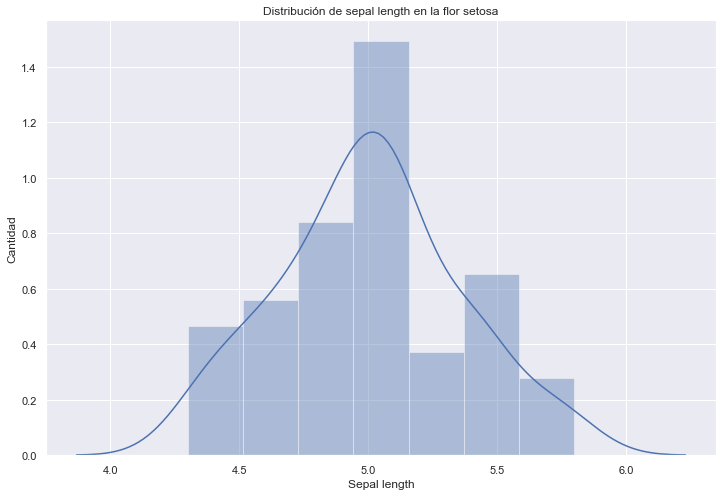

In [46]:
sns.distplot(setosa['sepal_length'], bins=7)
plt.xlabel("Sepal length")
plt.ylabel("Cantidad")
plt.title("Distribución de sepal length en la flor setosa");

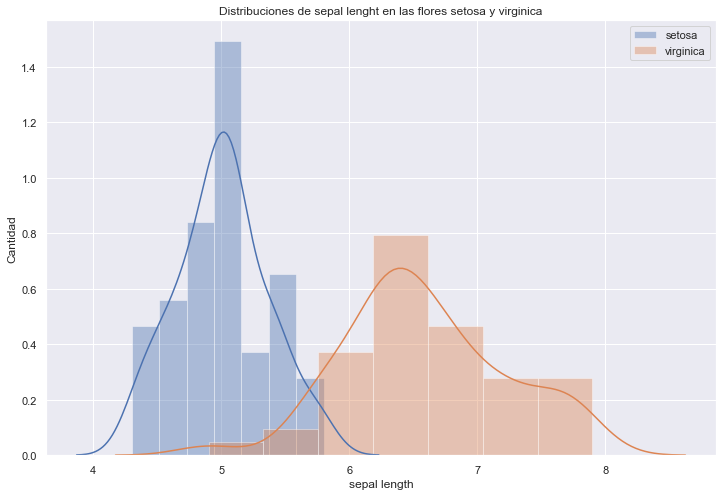

In [47]:
virginica = iris.query('species == "virginica"')
sns.distplot(setosa['sepal_length'], bins=7, label = 'setosa')
sns.distplot(virginica['sepal_length'], bins=7, label = 'virginica')
plt.xlabel("sepal length")
plt.ylabel("Cantidad")
plt.title("Distribuciones de sepal lenght en las flores setosa y virginica")
plt.legend()


### Bar plot
Útil para comparar los valores de ciertas variables en diferentes categorías. Por ejemplo, podemos comparar el largo promedio del pétalo para cada especie de flor con un bar plot.

In [48]:
mean_values = iris.groupby('species').mean()
mean_values

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


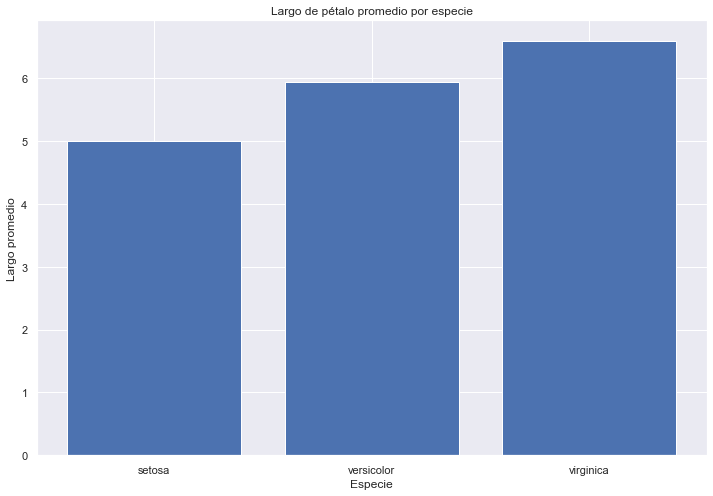

In [49]:
plt.bar(mean_values.index, mean_values['sepal_length'])
plt.xlabel("Especie")
plt.ylabel("Largo promedio")
plt.title("Largo de pétalo promedio por especie")
plt.show()

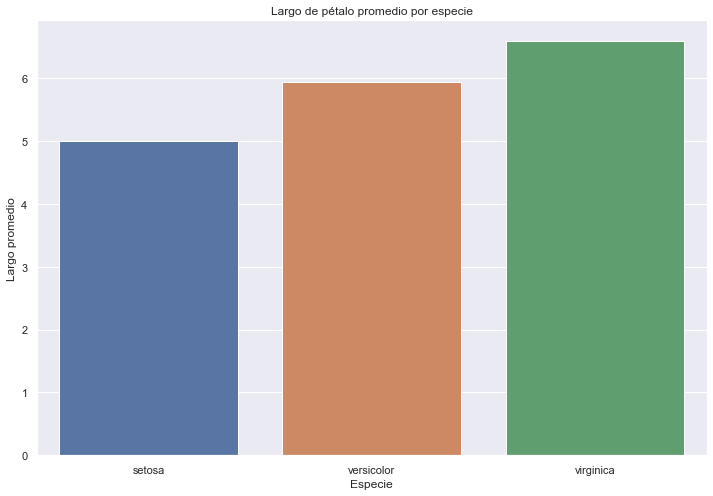

In [50]:
sns.barplot(mean_values.index, mean_values['sepal_length'])
plt.xlabel("Especie")
plt.ylabel("Largo promedio")
plt.title("Largo de pétalo promedio por especie");

### Subplots
Para mostrar muchos plots en una misma imagen y poder compararlos se usan subplots.

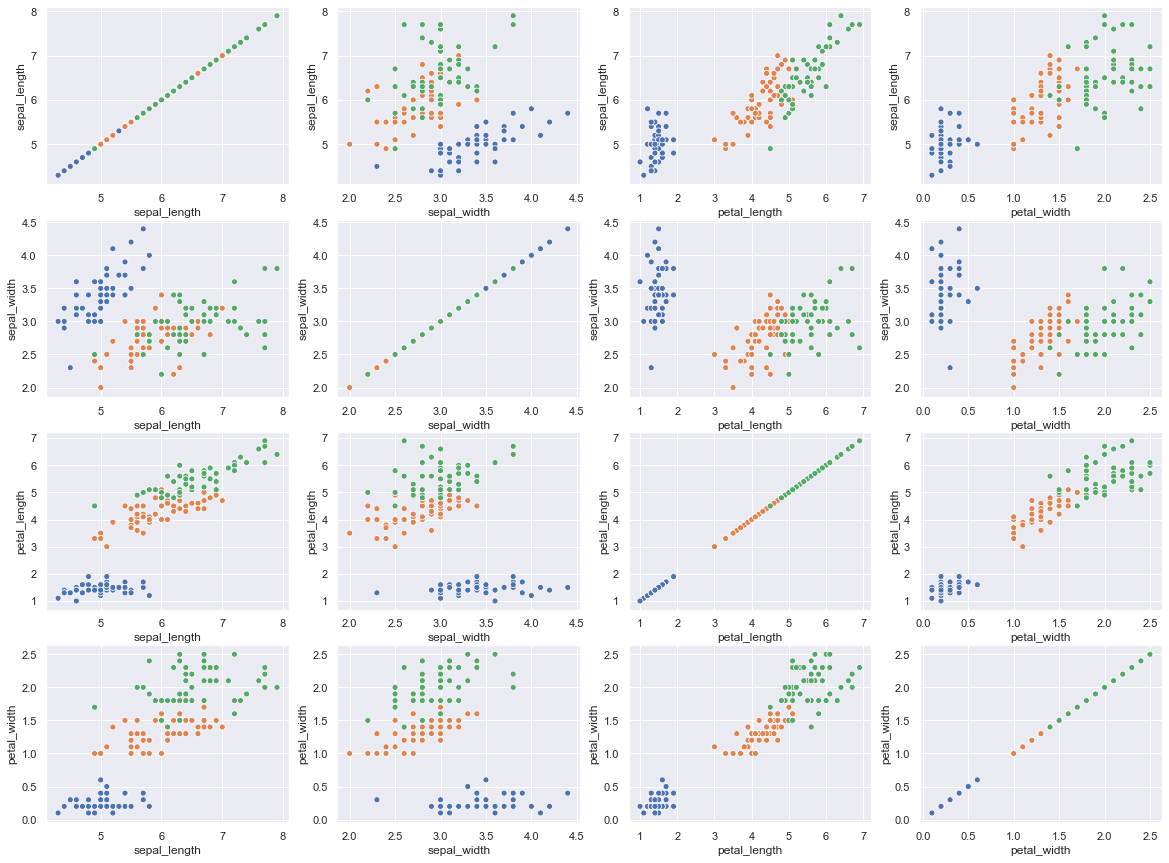

In [51]:
i = 1
plt.figure(figsize=(20,15))
for feature_1 in iris.drop('species', axis=1).columns:
    for feature_2 in iris.drop('species', axis=1).columns:
        plt.subplot(4, 4, i)
        i += 1
        sns.scatterplot(x=feature_2, y=feature_1, data=iris, hue="species", legend=False)